 **Made By :-  Ashu Kumar**

# <center>Movie Rating Prediction</center>

The goal of this project is to build a prediction model that predict movies on the basis of its rating. The data lies in three different DAT file which we have to merege together to form a single dataset. Here's a brief description of the columns:

+ MovieID: An identifier for each movie in the dataset.
+ Title: The title or name of the movie.
+ UserID: An identifier for each user who provided a rating.
+ Age: The age of the user who provided the rating.
+ Gender: The gender of the user (e.g., Male, Female, Other).
+ Occupation: The occupation or profession of the user.
+ Rating: The rating given by the user for the movie, typically on a scale (e.g., 1-5 stars).



**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline
sns.set(color_codes=True)

**Load the dataset into jupyter notebook**

In [2]:
movies = pd.read_csv('movies.dat', sep='::',  encoding='latin1')

In [3]:
movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
ratings = pd.read_csv("ratings.dat",sep='::')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [6]:
users = pd.read_csv("users.dat",sep='::')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [7]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

df = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,M,16,5
1,3068,"Verdict, The (1982)",2,56,M,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4
3,647,Courage Under Fire (1996),2,56,M,16,3
4,2194,"Untouchables, The (1987)",2,56,M,16,4


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [8]:
df.shape

(998080, 7)

**Conduct an examination of the columns present in the dataset.**

In [9]:
df.columns

Index(['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating'], dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     998080 non-null  int64 
 1   Title       998080 non-null  object
 2   UserID      998080 non-null  int64 
 3   Age         998080 non-null  int64 
 4   Gender      998080 non-null  object
 5   Occupation  998080 non-null  int64 
 6   Rating      998080 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 60.9+ MB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [11]:
df.describe()

,MovieID,UserID,Age,Occupation,Rating
count,998080.000000,998080.000000,998080.000000,998080.000000,998080.000000
mean,1869.434325,3024.608884,29.744052,8.035970,3.580357
std,1093.878797,1728.273821,11.749987,6.531805,1.117300
min,2.000000,2.000000,1.000000,0.000000,1.000000
25%,1034.000000,1506.000000,25.000000,2.000000,3.000000
50%,1845.000000,3070.000000,25.000000,7.000000,4.000000
75%,2772.000000,4476.000000,35.000000,14.000000,4.000000
max,3952.000000,6040.000000,56.000000,20.000000,5.000000


In [12]:
df.describe(include=['object','bool'])

,Title,Gender
count,998080,998080
unique,3705,2
top,American Beauty (1999),M
freq,3428,752283


**Conduct an examination of the distinct values present in each column of the dataset.**

In [13]:
df.nunique()

MovieID       3705
Title         3705
UserID        6039
Age              7
Gender           2
Occupation      21
Rating           5
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [14]:
df.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

## Data Visualization

**Visualize the survival outcomes of individuals**

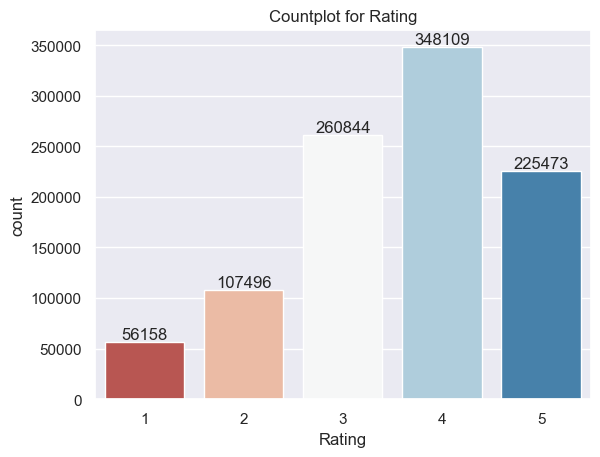

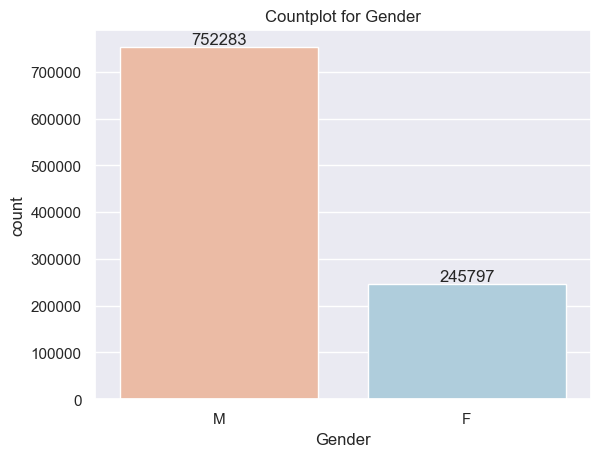

In [15]:
cat_vars = ['Rating', 'Gender']

for column in cat_vars:
    ax = sns.countplot(data=df, x=column, palette='RdBu')
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {column}')
    plt.show()

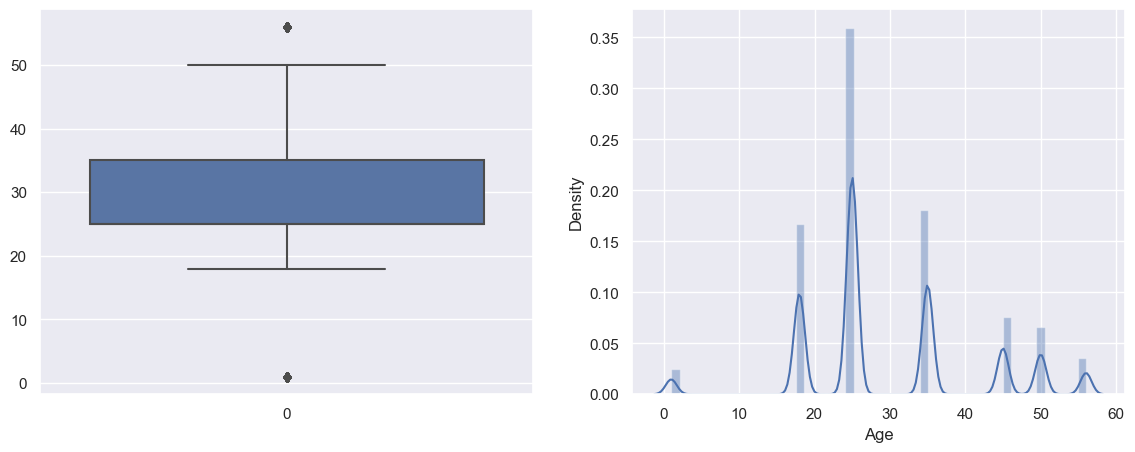

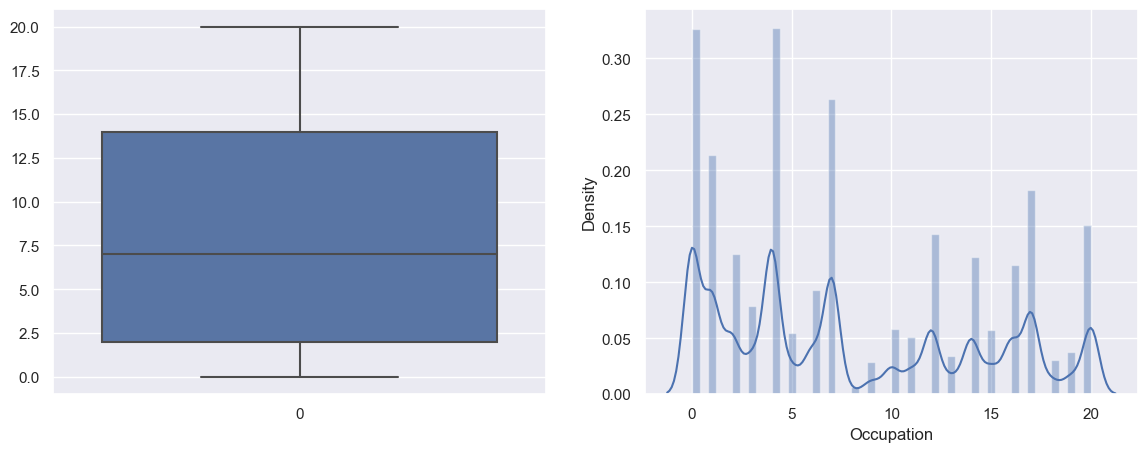

In [16]:
num_var = ['Age','Occupation']

for column in num_var:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

**Pairplot to visualize relationships between variables**

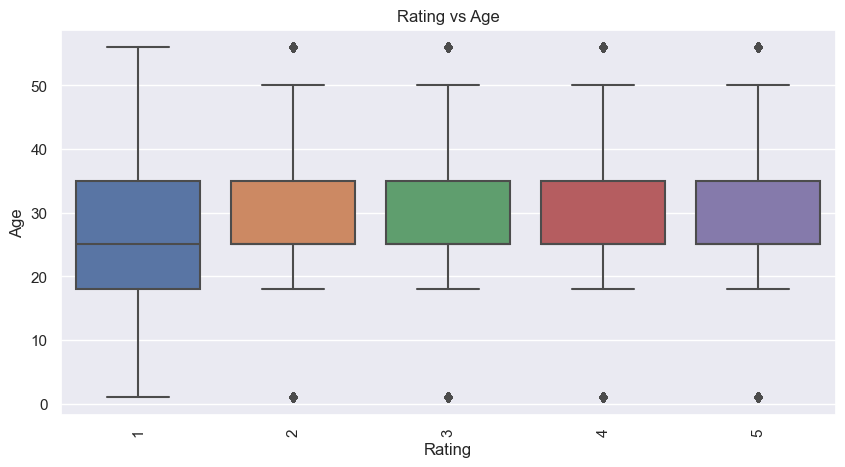

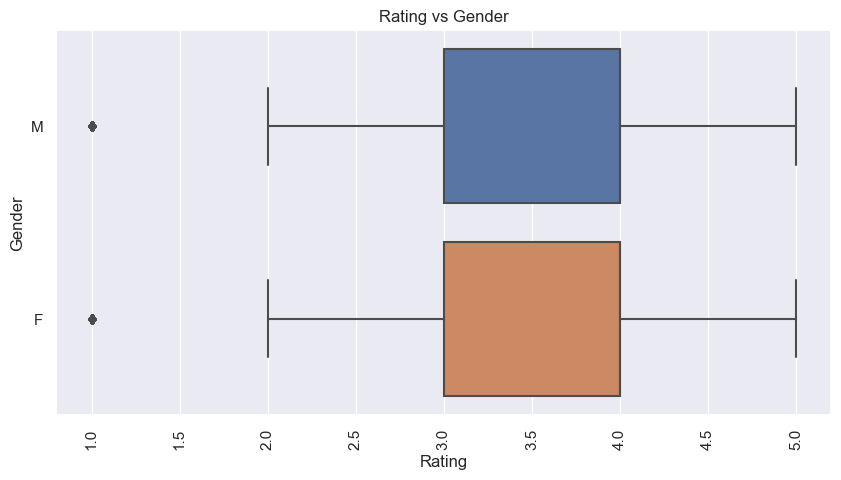

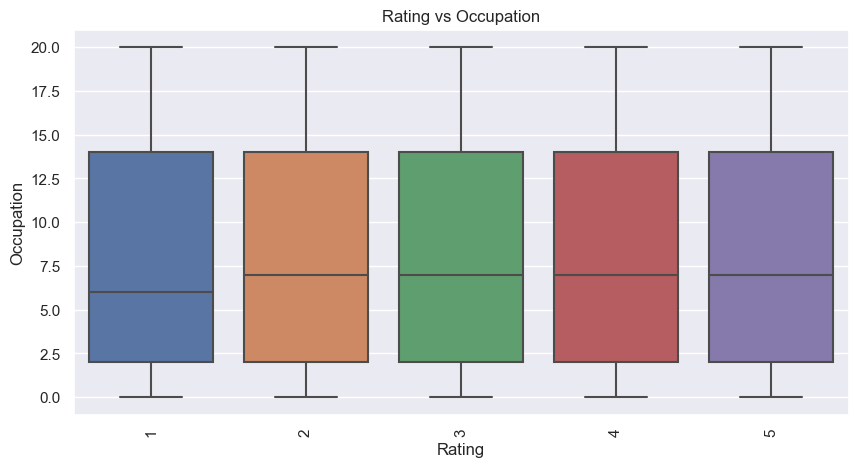

In [17]:
numeric_variables = ['Age','Gender','Occupation']
for var in numeric_variables:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Rating', y=var, data=df)
    plt.title(f"Rating vs {var}")
    plt.xticks(rotation=90)
    plt.xlabel('Rating')
    plt.ylabel(var)
    plt.show()

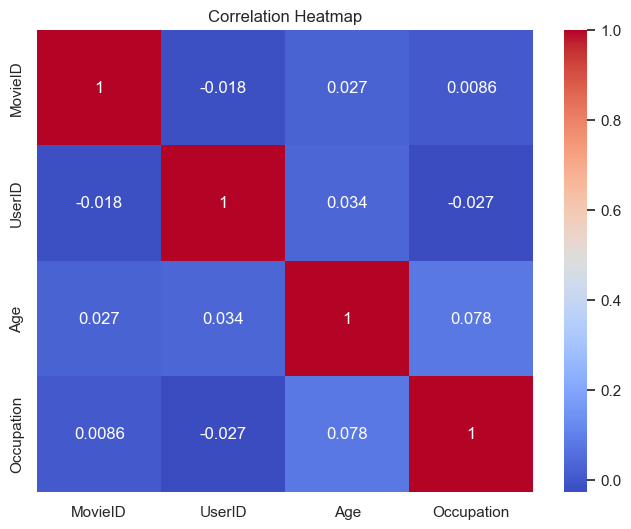

In [18]:
# Correlation heatmap
data = df.copy()
data.drop("Rating", axis=1, inplace=True)
correlation = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
def categorize_gender(score):
    if score == 'M':
        return "1"   
    else:
        return "0"
# 1 means male and 0 means Female
# Create the new categorical variable
df['Chance_Gender'] = df['Gender'].apply(categorize_gender)
df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Chance_Gender
0,1357,Shine (1996),2,56,M,16,5,1
1,3068,"Verdict, The (1982)",2,56,M,16,4,1
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4,1
3,647,Courage Under Fire (1996),2,56,M,16,3,1
4,2194,"Untouchables, The (1987)",2,56,M,16,4,1


In [20]:
def categorize_Rating(score):
    if score > 3:
        return "1"   
    else:
        return "0"
# 1 means high and 0 means low rating
# Create the new categorical variable
df['Chance_Rating'] = df['Rating'].apply(categorize_Rating)
df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Chance_Gender,Chance_Rating
0,1357,Shine (1996),2,56,M,16,5,1,1
1,3068,"Verdict, The (1982)",2,56,M,16,4,1,1
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4,1,1
3,647,Courage Under Fire (1996),2,56,M,16,3,1,0
4,2194,"Untouchables, The (1987)",2,56,M,16,4,1,1


In [21]:
X = df.drop(["Rating","Gender","Chance_Rating","MovieID","Title","UserID"], axis=1)
y = df["Chance_Rating"]
X.head()

,Age,Occupation,Chance_Gender
0,56,16,1
1,56,16,1
2,56,16,1
3,56,16,1
4,56,16,1


**split data into training and testing sets**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a list of diverse machine learning algorithms, which will serve as the classifiers for our analysis.**

In [23]:
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

In [24]:
metrics = {
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Mean Squared Error': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

**Create a pipeline by combining the StandardScaler and the chosen classifier, train it on the training data, predict the rocket launches for the test data, calculate the evaluation metrics, store them in the dictionary, and display the evaluation metrics for the current classifier.**

In [25]:
for name, classifier in classifiers:
    # Create a pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict the rocket launches for the test data
    y_pred = pipeline.predict(X_test)

    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionary
    metrics['R2 Score'].append(r2)
    metrics['Mean Absolute Error'].append(mae)
    metrics['Mean Squared Error'].append(mse)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    # Display the evaluation metrics for the current classifier
    print(f"Metrics for {name}:")
    print("R2 Score:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

Metrics for Random Forest:
R2 Score: -0.7186264676727763
Mean Absolute Error: 0.4196206716896441
Mean Squared Error: 0.4196206716896441
Accuracy: 0.5803793283103559
Precision: 0.5834662257660205
Recall: 0.9507656741582798
F1 Score: 0.7231496874969014

Metrics for Gaussian Naive Bayes:
R2 Score: -0.7348559906832841
Mean Absolute Error: 0.423583279897403
Mean Squared Error: 0.423583279897403
Accuracy: 0.576416720102597
Precision: 0.576416720102597
Recall: 1.0
F1 Score: 0.7312999319939748

Metrics for Gradient Boosting Classifier:
R2 Score: -0.7305883032165514
Mean Absolute Error: 0.42254127925617185
Mean Squared Error: 0.42254127925617185
Accuracy: 0.5774587207438282
Precision: 0.5773328767951016
Recall: 0.9964714675566216
F1 Score: 0.7310892755804093

Metrics for Logistic Regression:
R2 Score: -0.7348559906832841
Mean Absolute Error: 0.423583279897403
Mean Squared Error: 0.423583279897403
Accuracy: 0.576416720102597
Precision: 0.576416720102597
Recall: 1.0
F1 Score: 0.7312999319939748



**Print classification reports for all classifiers**

In [26]:
metrics_df = pd.DataFrame(metrics, index=[name for name, _ in classifiers])

# Find the best algorithm based on the highest accuracy
sorted_metrics_df = metrics_df.sort_values(by=['Accuracy', 'Precision','R2 Score','Recall','F1 Score'], ascending=False)

# Find the best algorithm based on both accuracy and precision
best_algorithm = sorted_metrics_df.index[0]

# Print the evaluation metrics for each algorithm
print(sorted_metrics_df)

# Print the best algorithm
print('Best Algorithm:', best_algorithm)

                              R2 Score  Mean Absolute Error  \
Random Forest                -0.718626             0.419621   
Decision Tree                -0.718626             0.419621   
Gradient Boosting Classifier -0.730588             0.422541   
Gaussian Naive Bayes         -0.734856             0.423583   
Logistic Regression          -0.734856             0.423583   
K-Nearest Neighbors          -0.925999             0.470253   

                              Mean Squared Error  Accuracy  Precision  \
Random Forest                           0.419621  0.580379   0.583466   
Decision Tree                           0.419621  0.580379   0.583466   
Gradient Boosting Classifier            0.422541  0.577459   0.577333   
Gaussian Naive Bayes                    0.423583  0.576417   0.576417   
Logistic Regression                     0.423583  0.576417   0.576417   
K-Nearest Neighbors                     0.470253  0.529747   0.581962   

                                Recall  F1 Sco

## MODEL EVALUATION

**Now, let's create two lists: "accuracy_before" and "accuracy_after" to calculate the accuracy before cross-validation and the accuracy after cross-validation, respectively.**

In [27]:
accuracy_before = []
accuracy_after = []

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_before.append(accuracy)
print('Accuracy Before CV:', accuracy)

Accuracy Before CV: 0.5297471144597627


**Let's calculate the accuracy after cross-validation, cross-validation scores, and the average cross-validation score.**

In [29]:
scores = cross_val_score(pipeline, X, y, cv=5)
accuracy_cv = np.mean(scores)
accuracy_after.append(accuracy_cv)
print('Accuracy After CV:', accuracy_cv)
print('Cross-Validation Scores:', scores)
print('Average Cross-Validation Score:', np.mean(scores))

Accuracy After CV: 0.5182380169926258
Cross-Validation Scores: [0.47922511 0.54594822 0.51844542 0.52899066 0.51858067]
Average Cross-Validation Score: 0.5182380169926258


**Now let's create a confusion plot to visualize the test and prediction results.**

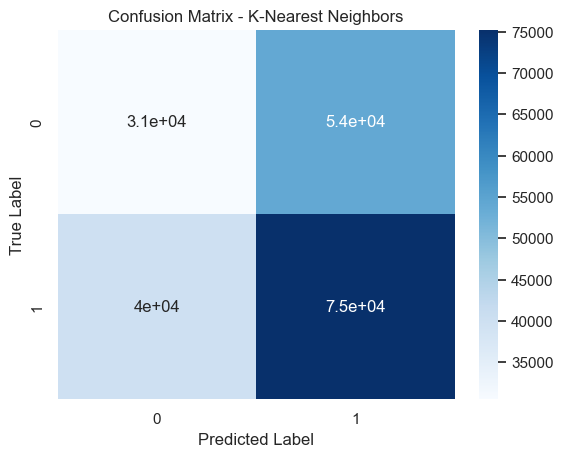

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title('Confusion Matrix - ' + name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()